d:\APN\Classification Model\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
C:\Users\risab\AppData\Local\Temp\ipykernel_6308\3184588446.py:14: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr                               # standard library to determine image type, Helps identify invalid or fake image files.


<class 'numpy.ndarray'>


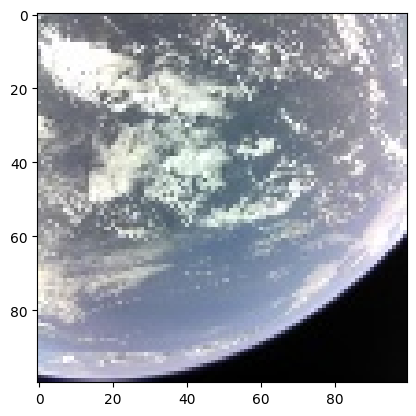

In [ ]:
import tensorflow as tf                   # loads tensorflow library, later used to build and train neural networks
import os                                 # Used to interact with the file system (folders and files).

# remove dodgy(corrupt or non images files) images
import cv2                                  # OpenCV library for image processing (Used for reading and processing images)
# import imghdr                               # (deprecated from py 3.13.x) standard library to determine image type, Helps identify invalid or fake image files.
from matplotlib import pyplot as plt        # Used to display images and plots.

# Create the dataset with batching and image size
import numpy as np

os.listdir("../data")                     # Shows all files and folders inside ../data

# # Detects available GPUs. Enables dynamic memory allocation. Prevents TensorFlow from using all GPU memory at once
#gpus = tf.config.experimental.list_physical_devices('GPU')
#print(gpus)                         # shows list of available GPUs
#for gpu in gpus:
#    tf.config.experimental.set_memory_growth(gpu, True)



data_dir = '../data'                        # Stores the path where your image dataset is located.
# os.listdir(os.path.join(data_dir))        # ==>[ bad1 , good1]


# image_exts=['jpeg','jpg','bmp','png']       # List of valid image file extensions.(non need with openCV method. )
# image_exts                                # ==> ['jpeg', 'jpg', 'bmp', 'png'] 


img =  cv2.imread(os.path.join(data_dir, "good1", "0.jpg"))         # Reads the image located at ../data/good1/0.jpg using OpenCV. When OpenCV reads an image, it always returns a NumPy array.
# img.shape                                                         # (100 , 100 , 3)
print(type(img))                             # <class 'numpy.ndarray'>


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    #OpenCV loads images in BGR format. Matplotlib expects RGB. This line converts BGR → RGB before displaying.
plt.show()                                          # Displays the image(RGB).         

Found 29 files belonging to 2 classes.
NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001F5529D2D20>)
(8, 100, 100, 3)


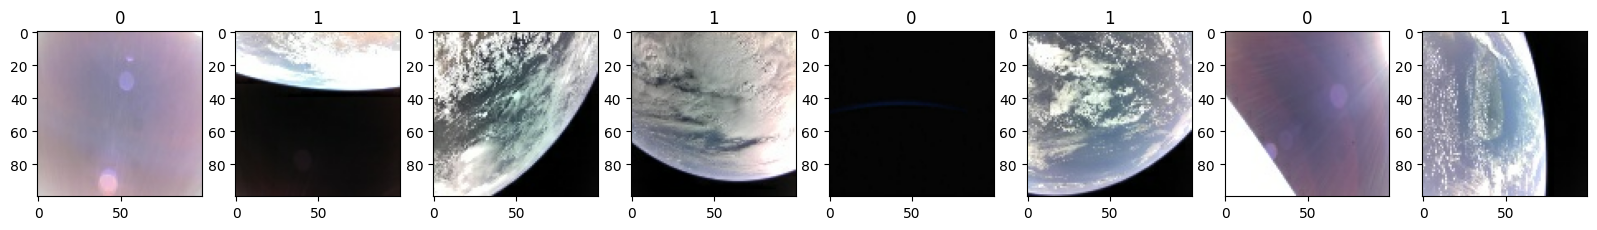

In [10]:



# Reads images from the ../data folder. Creates batches of 8 images, each resized to 100x100 pixels. 
# Automatically assigns labels based on folder names. Now data is a TensorFlow dataset, not a NumPy array yet.
# creates labels based on folder names (bad1 → 0, good1 → 1)
data = tf.keras.utils.image_dataset_from_directory('../data', batch_size=8, image_size=(100,100))

# as_numpy_iterator() converts TensorFlow tensors into NumPy arrays. 
# batch is the first batch of 8 images.
# 1. batch[0] → images (shape: 8, 100, 100, 3)
# 2. batch[1] → labels (0 or 1)
data_iterator = data.as_numpy_iterator()
print(data_iterator)
batch = data_iterator.next()

print(batch[0].shape)  # images shape


# Creates a row of 8 subplots (nrows=1, ncols=8)
# Loops through the 8 images in the batch:
# Converts pixels to int (for visualization)
# Displays each image
# Sets the title as the class label (0 = bad, 1 = good)
fig,ax = plt.subplots(nrows=1 , ncols=8 , figsize=(20,20))
for idx , img in enumerate(batch[0][:8]):
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(batch[1][idx])
        
        #class 0 = bad
        #class 1 = good


In [ ]:
# display the image file names
for image_class in os.listdir(data_dir):                                 # Goes through each folder inside data_dir. Each folder represents a class (e.g., bad1, good1)
    for image in os.listdir(os.path.join(data_dir, image_class)):        # Loops through each image file in the class folder
        print(image)                                                     # Prints every file name
      
        
CLEAN_DATASET = False  # change to True only once (to avoid deleting images again and again, manual process)

if CLEAN_DATASET:
    for image_class in os.listdir(data_dir):                                
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)          # Full path to the image file,  ../data/good1/0.jpg
            try:
                img = cv2.imread(image_path)                                 # Tries to read the image using OpenCV, If the image is corrupted, this may fail.
                if img is None:                                              # If OpenCV fails to read the image, img will be None  
                    print(f"Removing corrupted image: {image_path}")    
                    os.remove(image_path)                                    # Deletes the corrupted image file from the filesystem
            except Exception as e:                                           # Catches any other exceptions that may occur during image reading
                print('Removing corrupted image: {}'.format(image_path))     # Logs the removal of the corrupted image
                os.remove(image_path)                                        # Deletes the corrupted image file from the filesystem

16.jpg
17.jpg
18.jpg
19.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
314.jpg
556.jpg
0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
2.jpg
3 (3).jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
